Instalar la siguiente libreria:

`!pip install psycopg2`

# Cargar las librerias

In [1]:
import psycopg2
import pandas as pd

In [2]:
# Reemplaza estos valores con los de tu base de datos
dbname = "restaurante"
user = "postgres"
password = "naren2020"
host = "localhost"

In [3]:
# Establece la conexión
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host)

In [4]:
# Crea un cursor para ejecutar consultas

sql = "SELECT * FROM restau;"

In [5]:
# Ejecuta la consulta y guarda los resultados en un cursor
cursor = conn.cursor()

# Ejecuta una consulta
cursor.execute(sql)

In [6]:
# Crea un DataFrame a partir de los resultados del cursor
df = pd.read_sql_query(sql, conn)
df

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_26271/3622587619.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
0,2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
1,2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2,2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
3,2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
4,2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...,...
512,2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
513,2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
514,2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
515,2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          517 non-null    object 
 1   weekday       517 non-null    object 
 2   holiday       517 non-null    int64  
 3   holiday_name  517 non-null    object 
 4   rest1         478 non-null    float64
 5   rest2         478 non-null    float64
 6   rest3         478 non-null    float64
 7   rest4         478 non-null    float64
 8   total         478 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 36.5+ KB


In [9]:
df.isnull().sum()

date             0
weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [11]:
df["date"] = pd.to_datetime(df["date"], format = "%d-%m-%Y")
df

,date,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
0,2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
1,2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2,2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
3,2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
4,2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...,...
512,2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
513,2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
514,2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
515,2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dtypes

date            datetime64[ns]
weekday                 object
holiday                  int64
holiday_name            object
rest1                  float64
rest2                  float64
rest3                  float64
rest4                  float64
total                  float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          517 non-null    datetime64[ns]
 1   weekday       517 non-null    object        
 2   holiday       517 non-null    int64         
 3   holiday_name  517 non-null    object        
 4   rest1         478 non-null    float64       
 5   rest2         478 non-null    float64       
 6   rest3         478 non-null    float64       
 7   rest4         478 non-null    float64       
 8   total         478 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 36.5+ KB


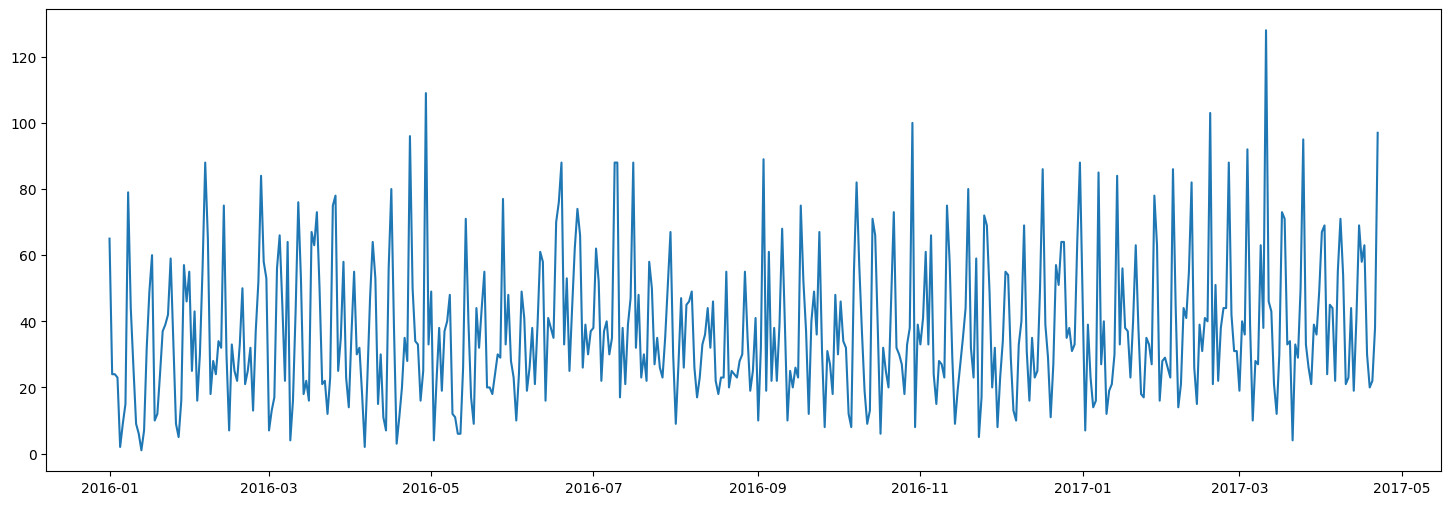

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,6))
plt.plot(df["date"], df["rest1"], label = "Restaurante 1")
plt.show()

In [ ]:
# Cierra la conexión
conn.close()
